Theoretical mean     = 5.0000
Sample mean (n=1000) = 5.0393
Theoretical variance = 3.5000
Sample variance (n=1000) = 3.4877


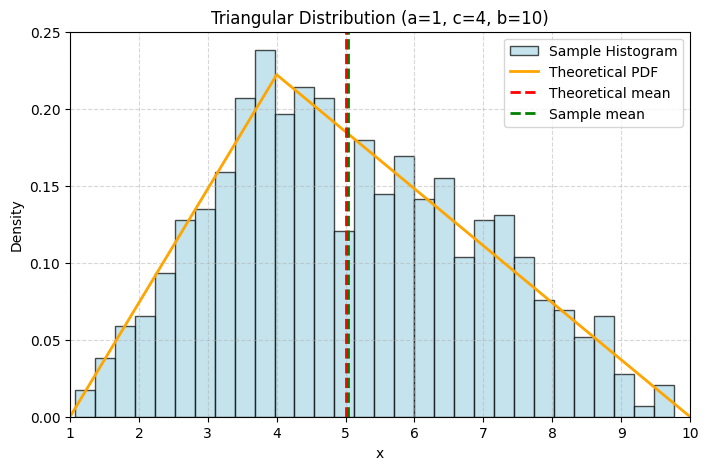

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter distribusi segitiga
a, c, b = 1, 4, 10
n = 1000  # jumlah sampel

def generate_triangular_samples(a, c, b, n):
  """Generates n samples from a triangular distribution using inverse transform sampling."""
  R = np.random.uniform(size=n) # Generate n random values from U(0,1)

  # Calculate the split point for the inverse CDF
  split_point = (c - a) / (b - a)

  samples = np.zeros(n)

  # Apply the inverse transform based on R values
  # For the left part of the CDF
  mask_left = R < split_point
  samples[mask_left] = a + np.sqrt(R[mask_left] * (b - a) * (c - a))

  # For the right part of the CDF
  mask_right = ~mask_left
  samples[mask_right] = b - np.sqrt((1 - R[mask_right]) * (b - a) * (b - c))

  return samples

def triangular_pdf(x, a, c, b):
  """Calculates the Probability Density Function (PDF) for a triangular distribution."""
  pdf = np.zeros_like(x, dtype=float)

  # PDF for x in [a, c)
  mask_left = (x >= a) & (x < c)
  pdf[mask_left] = 2 * (x[mask_left] - a) / ((b - a) * (c - a))

  # PDF for x in [c, b]
  mask_right = (x >= c) & (x <= b)
  pdf[mask_right] = 2 * (b - x[mask_right]) / ((b - a) * (b - c))

  return pdf

# Generate the samples using the defined function
samples = generate_triangular_samples(a, c, b, n)

# Calculate sample mean and variance
sample_mean = np.mean(samples)
sample_var = np.var(samples)

# Calculate theoretical values
mean_theoretical = (a + b + c) / 3
var_theoretical = (a**2 + b**2 + c**2 - a*b - a*c - b*c) / 18

# Display results
print(f"Theoretical mean     = {mean_theoretical:.4f}")
print(f"Sample mean (n={n}) = {sample_mean:.4f}")
print(f"Theoretical variance = {var_theoretical:.4f}")
print(f"Sample variance (n={n}) = {sample_var:.4f}")

# Visualize histogram
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=30, density=True, color='lightblue', edgecolor='black', alpha=0.7, label='Sample Histogram')

# Plot theoretical PDF curve
x_pdf = np.linspace(a, b, 1000) # Generate x values for plotting the PDF
y_pdf = triangular_pdf(x_pdf, a, c, b)
plt.plot(x_pdf, y_pdf, color='orange', linestyle='-', linewidth=2, label='Theoretical PDF')

plt.title(f"Triangular Distribution (a={a}, c={c}, b={b})")
plt.xlabel("x")
plt.ylabel("Density")

# Set x-axis limits to match the distribution range
plt.xlim(a, b)

# Add theoretical and sample mean lines
plt.axvline(mean_theoretical, color='red', linestyle='--', linewidth=2, label='Theoretical mean')
plt.axvline(sample_mean, color='green', linestyle='--', linewidth=2, label='Sample mean')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()